In [350]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import acquire
import prepare
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [5]:
train, validate, test = prepare.prep_titanic(acquire.get_titanic_data())
train.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone,Q,S
583,583,0,1,male,36.000000,0,0,40.1250,C,First,Cherbourg,1,0,0
337,337,1,1,female,41.000000,0,0,134.5000,C,First,Cherbourg,1,0,0
50,50,0,3,male,7.000000,4,1,39.6875,S,Third,Southampton,0,0,1
218,218,1,1,female,32.000000,0,0,76.2917,C,First,Cherbourg,1,0,0
31,31,1,1,female,29.916875,1,0,146.5208,C,First,Cherbourg,0,0,0


In [6]:
#get value counts of survived (1) vs did not survive (0)
train.survived.value_counts()

0    307
1    190
Name: survived, dtype: int64

In [ ]:
#1. What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a
#   classification problem is predicting the most prevelant class in the training dataset (the mode). 
#   When you make those predictions, what is your accuracy? This is your baseline accuracy.

In [7]:
#create the baseline
train["baseline"] = 0
baseline_accuracy = (train.survived == train.baseline).mean()
print(f'Baseline accuracy is: {baseline_accuracy:.2%}')

Baseline accuracy is: 61.77%


In [8]:
df = pd.DataFrame({
    'actual': ['1','1','0','0','1','0','0','0','0','0','0'],
    'prediction': ['0','0','0','0','0','0','0','0','0','0','0'],
})
df

,actual,prediction
0,1,0
1,1,0
2,0,0
3,0,0
4,1,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [9]:
pd.crosstab(df.actual, df.prediction).reset_index()

prediction,actual,0
0,0,8
1,1,3


In [10]:
(0+1)/(0+1+1+0)

0.5

In [ ]:
# 2. Fit the decision tree classifier to your training sample and transform 
#   (i.e. make predictions on the training sample)

In [82]:
# identify columns that you want to use

#only using the following columns
X_cols = ['pclass', 'fare', 'alone']

#only trying to see who survived or died
y_col = 'survived'

In [83]:
# split your data - train, validate, test

X_train, y_train = train[X_cols], train[y_col]
X_validate, y_validate = validate[X_cols], validate[y_col]
X_test, y_test = test[X_cols], test[y_col]

In [84]:
# identify model 1 

model1 = DecisionTreeClassifier()

In [85]:
# fit model 1 using train data

model1.fit(X_train, y_train)

DecisionTreeClassifier()

In [86]:
# get scores for train and validate, not using test yet

print(f'training score: {model1.score(X_train, y_train):.2%}')
print(f'validate score: {model1.score(X_validate, y_validate):.2%}')

training score: 85.71%
validate score: 71.50%


In [87]:
# model 1 is the prediction

train['model1'] = model1.predict(X_train)
train.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone,Q,S,baseline,model1
583,583,0,1,male,36.000000,0,0,40.1250,C,First,Cherbourg,1,0,0,0,0
337,337,1,1,female,41.000000,0,0,134.5000,C,First,Cherbourg,1,0,0,0,1
50,50,0,3,male,7.000000,4,1,39.6875,S,Third,Southampton,0,0,1,0,0
218,218,1,1,female,32.000000,0,0,76.2917,C,First,Cherbourg,1,0,0,0,1
31,31,1,1,female,29.916875,1,0,146.5208,C,First,Cherbourg,0,0,0,0,1


In [88]:
# 3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [89]:
# model 1 score
# code == model1.score(X_train, y_train)

print(f'model1 score: {model1.score(X_train, y_train):.2%}')

model1 score: 85.71%


In [90]:
# confusion matrix

pd.crosstab(train.survived, train.model1)

model1,0,1
survived,,
0,297,10
1,61,129


In [91]:
# classification report

print(classification_report(train.survived, train.model1, zero_division =True))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89       307
           1       0.93      0.68      0.78       190

    accuracy                           0.86       497
   macro avg       0.88      0.82      0.84       497
weighted avg       0.87      0.86      0.85       497



In [92]:
# 4. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, 
#    precision, recall, f1-score, and support. 

In [93]:
# to get percentage, normalize=true

pd.crosstab(train.survived, train.model1, normalize=True)

model1,0,1
survived,,
0,0.597586,0.020121
1,0.122736,0.259557


In [94]:
pd.DataFrame(classification_report(train.survived, train.model1, zero_division =True, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.829609,0.928058,0.857143,0.878833,0.867245
recall,0.967427,0.678947,0.857143,0.823187,0.857143
f1-score,0.893233,0.784195,0.857143,0.838714,0.851548
support,307.000000,190.000000,0.857143,497.000000,497.000000


In [95]:
# Precision = TP / (TP+FP)

precision= 298 / (298+61)
precision

0.83008356545961

In [96]:
# computer is using the (1- survived) as a positive

precision_score(train.survived, train.model1)

0.9280575539568345

In [97]:
# Recall = TP/ (TP+FN)

recall= 298/ (298+9)
recall

0.9706840390879479

In [98]:
# computer is using the (1- survived) as a positive

recall_score(train.survived, train.model1)

0.6789473684210526

In [99]:
# Accuracy = TP+TN/(TP +TN+FN+FP)

accuracy= (298+129) / (298+129+61+9)
accuracy

0.8591549295774648

In [100]:
accuracy_score(train.survived, train.model1)

0.8571428571428571

In [101]:
# OR make classification_report its own value

cr= pd.DataFrame(classification_report(train.survived, train.model1, zero_division =True, output_dict=True))

In [102]:
# call classification variable- column 1

cr['0']

precision      0.829609
recall         0.967427
f1-score       0.893233
support      307.000000
Name: 0, dtype: float64

In [103]:
# 5. Run through steps 2-4 using a different max_depth value.

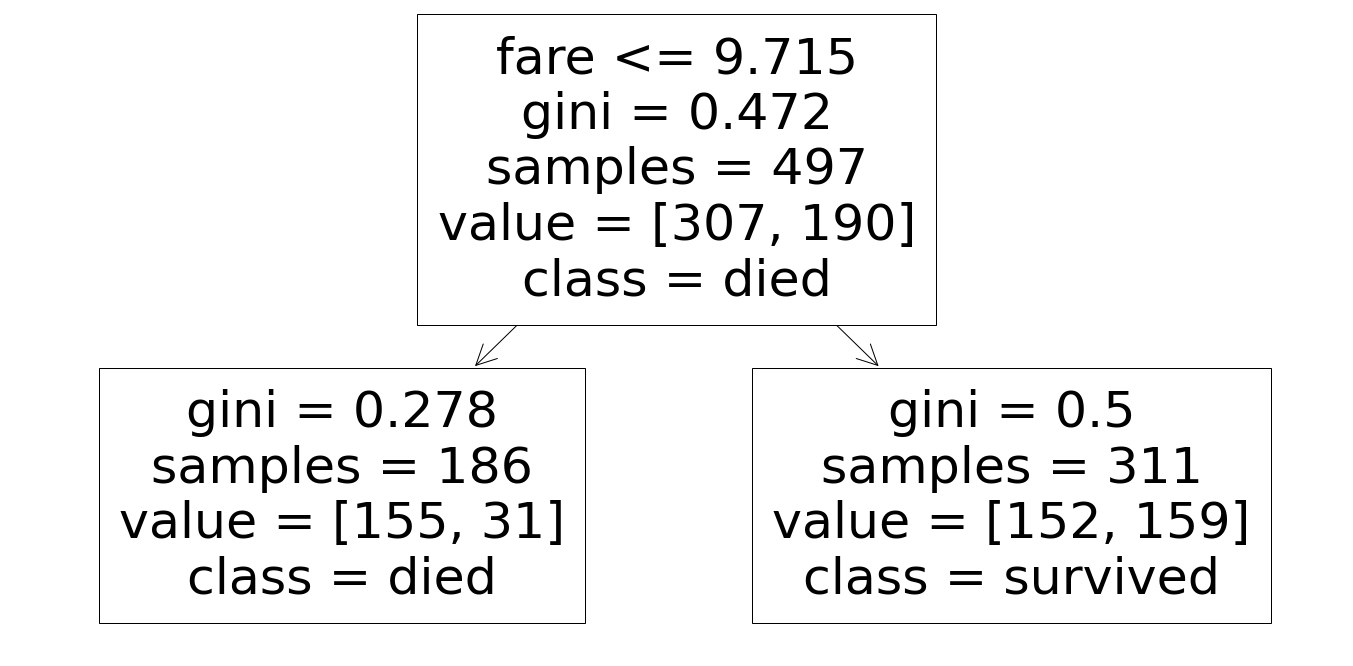

In [104]:
model2 = DecisionTreeClassifier(max_depth=1)
model2.fit(X_train, y_train)

plt.figure(figsize=(24,12))

plot_tree(model2, feature_names=X_train.columns.tolist(), class_names=['died', 'survived'])
plt.show()

In [105]:
# max_depth = 1 score
# code == model2.score(X_train, y_train)

print(f'model2 score: {model2.score(X_train, y_train):.2%}')

model2 score: 63.18%


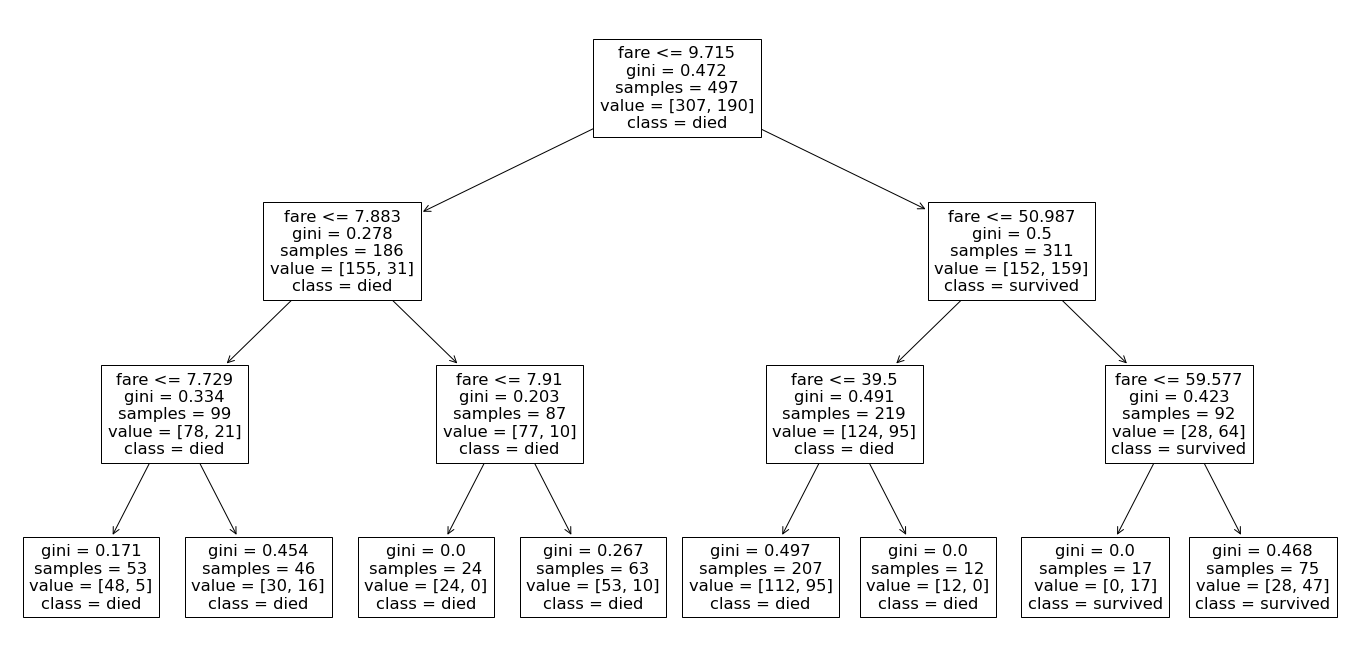

In [106]:
model3 = DecisionTreeClassifier(max_depth=3)
model3.fit(X_train, y_train)

plt.figure(figsize=(24,12))

plot_tree(model3, feature_names=X_train.columns.tolist(), class_names=['died', 'survived'])
plt.show()

In [107]:
# max_depth = 3 score

# code == model3.score(X_train, y_train)
print(f'model3 score: {model3.score(X_train, y_train):.2%}')

model3 score: 69.01%


In [108]:
# 6. Which model performs better on your in-sample data?
# - Model 1 did the best of all three models with an accuracy 

In [109]:
# 7. Which model performs best on your out-of-sample data, the validate set?
# - Model 3 has the highest accuracy in validate set

In [110]:
model1.fit(X_validate, y_validate)

DecisionTreeClassifier()

In [111]:
print(f'model1 score: {model1.score(X_validate, y_validate):.2%}')

model1 score: 85.51%


In [112]:
model2.fit(X_validate, y_validate)

DecisionTreeClassifier(max_depth=1)

In [113]:
print(f'model2 score: {model2.score(X_validate, y_validate):.2%}')

model2 score: 71.50%


In [114]:
model3.fit(X_validate, y_validate)

DecisionTreeClassifier(max_depth=3)

In [115]:
print(f'model3 score: {model3.score(X_validate, y_validate):.2%}')

model3 score: 73.83%


In [ ]:

# Random Forest Exercises


In [116]:
# 1. Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training
#    sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10.

X_train.head()

,pclass,fare,alone
583,1,40.1250,1
337,1,134.5000,1
50,3,39.6875,0
218,1,76.2917,1
31,1,146.5208,0


In [117]:
y_train.head()

583    0
337    1
50     0
218    1
31     1
Name: survived, dtype: int64

In [120]:
# make random forest

clf= RandomForestClassifier(min_samples_leaf = 1, max_depth = 10, random_state= 123)

In [121]:
# fit random forest

clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=123)

In [122]:
# use random forest

y_pred = clf.predict(X_train)
y_pred = clf.predict(X_train)

In [124]:
# shows an array of y_predictions
y_pred

array([0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,

In [ ]:
# 2. Evaluate your results using the model score, confusion matrix, and classification report.


In [123]:
# model score

clf.score(X_train, y_train)

0.8531187122736419

In [125]:
# model score for validate set

clf.score(X_validate, y_validate)

0.7570093457943925

In [126]:
train['model5'] = clf.predict(X_train)
train.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone,Q,S,baseline,model1,model5
583,583,0,1,male,36.000000,0,0,40.1250,C,First,Cherbourg,1,0,0,0,0,0
337,337,1,1,female,41.000000,0,0,134.5000,C,First,Cherbourg,1,0,0,0,1,1
50,50,0,3,male,7.000000,4,1,39.6875,S,Third,Southampton,0,0,1,0,0,0
218,218,1,1,female,32.000000,0,0,76.2917,C,First,Cherbourg,1,0,0,0,1,1
31,31,1,1,female,29.916875,1,0,146.5208,C,First,Cherbourg,0,0,0,0,1,1


In [127]:
# confusion matrix - created with crosstab

pd.crosstab(train.survived, train.model5)

model5,0,1
survived,,
0,287,20
1,53,137


In [128]:
# get the percentage to answer question

pd.crosstab(train.survived, train.model5, normalize=True)

model5,0,1
survived,,
0,0.577465,0.040241
1,0.106640,0.275654


In [129]:
#classification report

pd.DataFrame(classification_report(y_train, y_pred, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.844118,0.872611,0.853119,0.858365,0.855011
recall,0.934853,0.721053,0.853119,0.827953,0.853119
f1-score,0.887172,0.789625,0.853119,0.838398,0.849880
support,307.000000,190.000000,0.853119,497.000000,497.000000


In [ ]:
# 3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate,
#    false negative rate, precision, recall, f1-score, and support.

In [130]:
print(f'Random Forest Model 5 Accuracy score is: {clf.score(X_train, y_train):.2%}')
print(f'Random Forest Model 5 Precision score is: {precision_score(train.survived, train.model5):.2%}')
print(f'Random Forest Model 5 Recall score is: {recall_score(train.survived, train.model5):.2%}')
print(f'Random Forest Model 5 F1 score is: {f1_score(train.survived, train.model5):.2%}')

Random Forest Model 5 Accuracy score is: 85.31%
Random Forest Model 5 Precision score is: 87.26%
Random Forest Model 5 Recall score is: 72.11%
Random Forest Model 5 F1 score is: 78.96%


In [133]:
# 4. Run through steps increasing your min_samples_leaf and decreasing your max_depth.

In [134]:
# second model

clf= RandomForestClassifier(min_samples_leaf = 3, max_depth = 15, random_state= 123)

In [135]:
# second model - fit

clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, min_samples_leaf=3, random_state=123)

In [136]:
# second model - fit

y_pred = clf.predict(X_train)

In [137]:
# second model - train score 

clf.score(X_train, y_train)

0.7947686116700201

In [138]:
# second model - validate score

clf.score(X_validate, y_validate)

0.7523364485981309

In [139]:
# second model - insert column

train['model6'] = clf.predict(X_train)
train.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone,Q,S,baseline,model1,model5,model6
583,583,0,1,male,36.000000,0,0,40.1250,C,First,Cherbourg,1,0,0,0,0,0,0
337,337,1,1,female,41.000000,0,0,134.5000,C,First,Cherbourg,1,0,0,0,1,1,1
50,50,0,3,male,7.000000,4,1,39.6875,S,Third,Southampton,0,0,1,0,0,0,0
218,218,1,1,female,32.000000,0,0,76.2917,C,First,Cherbourg,1,0,0,0,1,1,1
31,31,1,1,female,29.916875,1,0,146.5208,C,First,Cherbourg,0,0,0,0,1,1,1


In [140]:
# second model - confusion matrix

pd.crosstab(train.survived, train.model6)

model6,0,1
survived,,
0,272,35
1,67,123


In [141]:
pd.DataFrame(classification_report(y_train, y_pred, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.802360,0.778481,0.794769,0.790420,0.793231
recall,0.885993,0.647368,0.794769,0.766681,0.794769
f1-score,0.842105,0.706897,0.794769,0.774501,0.790416
support,307.000000,190.000000,0.794769,497.000000,497.000000


In [142]:
print(f'Random Forest Model 6 Accuracy score is: {clf.score(X_train, y_train):.2%}')
print(f'Random Forest Model 6 Precision score is: {precision_score(train.survived, train.model6):.2%}')
print(f'Random Forest Model 6 Recall score is: {recall_score(train.survived, train.model6):.2%}')
print(f'Random Forest Model 6 F1 score is: {f1_score(train.survived, train.model6):.2%}')

Random Forest Model 6 Accuracy score is: 79.48%
Random Forest Model 6 Precision score is: 77.85%
Random Forest Model 6 Recall score is: 64.74%
Random Forest Model 6 F1 score is: 70.69%


In [143]:
# third model

clf= RandomForestClassifier(min_samples_leaf = 2, max_depth = 20, random_state= 123)

In [144]:
# third model - fit

clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=2, random_state=123)

In [145]:
# third model - fit

y_pred = clf.predict(X_train)

In [146]:
# second model - train score

clf.score(X_train, y_train)

0.8309859154929577

In [147]:
# second model - validate score

clf.score(X_validate, y_validate)

0.7616822429906542

In [148]:
# third model- insert column

train['model7'] = clf.predict(X_train)
train.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone,Q,S,baseline,model1,model5,model6,model7
583,583,0,1,male,36.000000,0,0,40.1250,C,First,Cherbourg,1,0,0,0,0,0,0,0
337,337,1,1,female,41.000000,0,0,134.5000,C,First,Cherbourg,1,0,0,0,1,1,1,1
50,50,0,3,male,7.000000,4,1,39.6875,S,Third,Southampton,0,0,1,0,0,0,0,0
218,218,1,1,female,32.000000,0,0,76.2917,C,First,Cherbourg,1,0,0,0,1,1,1,1
31,31,1,1,female,29.916875,1,0,146.5208,C,First,Cherbourg,0,0,0,0,1,1,1,1


In [149]:
# third model - confusion matrix

pd.crosstab(train.survived, train.model7)

model7,0,1
survived,,
0,283,24
1,60,130


In [150]:
print(f'Random Forest Model 6 Accuracy score is: {clf.score(X_train, y_train):.2%}')
print(f'Random Forest Model 6 Precision score is: {precision_score(train.survived, train.model6):.2%}')
print(f'Random Forest Model 6 Recall score is: {recall_score(train.survived, train.model6):.2%}')
print(f'Random Forest Model 6 F1 score is: {f1_score(train.survived, train.model6):.2%}')

Random Forest Model 6 Accuracy score is: 83.10%
Random Forest Model 6 Precision score is: 77.85%
Random Forest Model 6 Recall score is: 64.74%
Random Forest Model 6 F1 score is: 70.69%


In [151]:
# third model

clf= RandomForestClassifier(min_samples_leaf = 1, max_depth = 13, random_state= 123)

In [152]:
# third model - fit

clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=13, random_state=123)

In [153]:
# third model - fit

y_pred = clf.predict(X_train)

In [154]:
# second model - score train set

clf.score(X_train, y_train)

0.8571428571428571

In [155]:
# second model - score with validate set

clf.score(X_validate, y_validate)

0.7336448598130841

In [156]:
# third model - insert column

train['model7'] = clf.predict(X_train)
train.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone,Q,S,baseline,model1,model5,model6,model7
583,583,0,1,male,36.000000,0,0,40.1250,C,First,Cherbourg,1,0,0,0,0,0,0,0
337,337,1,1,female,41.000000,0,0,134.5000,C,First,Cherbourg,1,0,0,0,1,1,1,1
50,50,0,3,male,7.000000,4,1,39.6875,S,Third,Southampton,0,0,1,0,0,0,0,0
218,218,1,1,female,32.000000,0,0,76.2917,C,First,Cherbourg,1,0,0,0,1,1,1,1
31,31,1,1,female,29.916875,1,0,146.5208,C,First,Cherbourg,0,0,0,0,1,1,1,1


In [157]:
# third model - confusion matrix

pd.crosstab(train.survived, train.model7)

model7,0,1
survived,,
0,289,18
1,53,137


In [ ]:
print(f'Random Forest Model 7 Accuracy score is: {clf.score(X_train, y_train):.2%}')
print(f'Random Forest Model 7 Precision score is: {precision_score(train.survived, train.model7):.2%}')
print(f'Random Forest Model 7 Recall score is: {recall_score(train.survived, train.model7):.2%}')
print(f'Random Forest Model 7 F1 score is: {f1_score(train.survived, train.model7):.2%}')

In [ ]:
# 5. What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?
#    After making a few models, which one has the best performance (or closest metrics) on both train and validate?

# appears that max_depth=13 is the optimal level, anything above that gives same score.

# min_sample_leaf=1 (defaul) gives the optimal level, anything above that will give a lower score.

# clf= RandomForestClassifier(min_samples_leaf = 1, max_depth = 13)gives highest accuracy score in train

# would use recall - would not want to miss any positive cases

In [ ]:

# K-Nearest Neighbor Exercises


In [288]:
# continue working in your model file with the titanic dataset.

# 1. Fit a K-Nearest Neighbors classifier to your training sample and transform 
# (i.e. make predictions on the training sample)

In [289]:
train, validate, test = prepare.prep_titanic(acquire.get_titanic_data())
train.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone,Q,S
583,583,0,1,male,36.000000,0,0,40.1250,C,First,Cherbourg,1,0,0
337,337,1,1,female,41.000000,0,0,134.5000,C,First,Cherbourg,1,0,0
50,50,0,3,male,7.000000,4,1,39.6875,S,Third,Southampton,0,0,1
218,218,1,1,female,32.000000,0,0,76.2917,C,First,Cherbourg,1,0,0
31,31,1,1,female,29.916875,1,0,146.5208,C,First,Cherbourg,0,0,0


In [290]:
# using the following columns

X_cols = ['pclass', 'fare', 'alone', 'age']

# only wanting to see who survived or died
y_col = 'survived'

X_train, y_train = train[X_cols], train[y_col]
X_validate, y_validate = validate[X_cols], validate[y_col]
X_test, y_test = test[X_cols], test[y_col]

In [291]:
# 2 Evaluate your results using the model score, confusion matrix, and classification report.


In [292]:
# train model - Create KNN Object

# # weights = ['uniform', 'distance']

knn = KNeighborsClassifier(n_neighbors=1, weights='uniform')

# fit the model - fit the model to the training data

knn.fit(X_train, y_train)

#score the model - calculate accuracy

knn.score(X_train, y_train), knn.score(X_validate, y_validate)

(0.9698189134808853, 0.6869158878504673)

In [293]:
# confusion matrix

print(confusion_matrix(y_train, y_pred))

[[305   2]
 [ 94  96]]


In [260]:
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    print(f'Model:{k}')
    print(f'training accuracy: {knn.score(X_train, y_train):.2%}')
    print(f'validate accuracy: {knn.score(X_validate, y_validate):.2%}')
    print(f'accuracy score: {knn.score(X_test, y_test):.2%}')
    print ('-----------------')

Model:1
training accuracy: 96.98%
validate accuracy: 68.69%
accuracy score: 61.80%
-----------------
Model:2
training accuracy: 80.68%
validate accuracy: 65.89%
accuracy score: 61.80%
-----------------
Model:3
training accuracy: 81.09%
validate accuracy: 68.22%
accuracy score: 64.04%
-----------------
Model:4
training accuracy: 77.46%
validate accuracy: 66.82%
accuracy score: 65.17%
-----------------
Model:5
training accuracy: 76.86%
validate accuracy: 70.09%
accuracy score: 65.73%
-----------------
Model:6
training accuracy: 74.65%
validate accuracy: 66.82%
accuracy score: 67.98%
-----------------
Model:7
training accuracy: 74.65%
validate accuracy: 64.95%
accuracy score: 65.17%
-----------------
Model:8
training accuracy: 74.04%
validate accuracy: 67.29%
accuracy score: 65.73%
-----------------
Model:9
training accuracy: 74.85%
validate accuracy: 68.22%
accuracy score: 63.48%
-----------------
Model:10
training accuracy: 75.05%
validate accuracy: 66.36%
accuracy score: 62.36%
-------

In [261]:
# 3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate,
#    false negative rate, precision, recall, f1-score, and support.


In [175]:
# define the thing

knn = KNeighborsClassifier(n_neighbors=6)

# fit the thing (remmeber only fit on training data)

knn.fit(X_train, y_train)

# use the thing (calculate accuracy)
    
knn.score(X_train, y_train)

0.7464788732394366

In [277]:
print('For n_neighbors=6:')
print('-----------------')
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_train)
y_pred_proba = knn.predict_proba(X_train)

tn, fp, fn, tp = confusion_matrix(y_train, y_pred).ravel()

print("True Positives", tp)
print("False Positives", fp)
print("False Negatives", fn)
print("True Negatives", tn)

print("------------------")

accuracy = (tp + tn) / (tp + tn + fp + fn)
recall = tp / (tp + fn)
precision = tp / (tp + fp)

print("Accuracy is", accuracy)
print("Recall is", recall)
print("Precision is", precision)

print('-------------------------------')

print('KNN classifier accuracy on training set: ' + format(knn.score(X_train, y_train)))
print('KNN classifier accuracy on validate set:  '+ format(knn.score(X_validate, y_validate)))
print('KNN classifier accuracy on test set:  '+ format(knn.score(X_test, y_test)))

print('--------------------------------------------------------')

print(classification_report(y_train, y_pred))

For n_neighbors=6:
-----------------
True Positives 96
False Positives 2
False Negatives 94
True Negatives 305
------------------
Accuracy is 0.806841046277666
Recall is 0.5052631578947369
Precision is 0.9795918367346939
-------------------------------
KNN classifier accuracy on training set: 0.806841046277666
KNN classifier accuracy on validate set:  0.6588785046728972
KNN classifier accuracy on test set:  0.6179775280898876
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.76      0.99      0.86       307
           1       0.98      0.51      0.67       190

    accuracy                           0.81       497
   macro avg       0.87      0.75      0.77       497
weighted avg       0.85      0.81      0.79       497



In [266]:
# 4. Run through steps 2-4 setting k to 10


In [273]:
print('For setting k to 10:')
print('-------------------')

knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_train)
y_pred_proba = knn.predict_proba(X_train)
    
tn, fp, fn, tp = confusion_matrix(y_train, y_pred).ravel()
    
print("True Positives", tp)
print("False Positives", fp)
print("False Negatives", fn)
print("True Negatives", tn)

print("------------------")

accuracy = (tp + tn) / (tp + tn + fp + fn)
recall = tp / (tp + fn)
precision = tp / (tp + fp)

print("Accuracy is", accuracy)
print("Recall is", recall)
print("Precision is", precision)

print('--------------------------------')

print('KNN classifier accuracy on training set: ' + format(knn.score(X_train, y_train)))
print('KNN classifier accuracy on validate set:  '+ format(knn.score(X_validate, y_validate)))
print('KNN classifier accuracy on test set:  '+ format(knn.score(X_test, y_test)))

print('--------------------------------------------------------')

print(classification_report(y_train, y_pred))
    
print('-----------------------------------------------------')


For setting k to 10:
-------------------
True Positives 76
False Positives 25
False Negatives 114
True Negatives 282
------------------
Accuracy is 0.7203219315895373
Recall is 0.4
Precision is 0.7524752475247525
--------------------------------
KNN classifier accuracy on training set: 0.7203219315895373
KNN classifier accuracy on validate set:  0.705607476635514
KNN classifier accuracy on test set:  0.6685393258426966
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.71      0.92      0.80       307
           1       0.75      0.40      0.52       190

    accuracy                           0.72       497
   macro avg       0.73      0.66      0.66       497
weighted avg       0.73      0.72      0.70       497

-----------------------------------------------------


In [268]:
# 5. Run through setps 2-4 setting k to 20


In [271]:
print('For setting k to 20:')
print('-------------------')

knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_train)
y_pred_proba = knn.predict_proba(X_train)
    
tn, fp, fn, tp = confusion_matrix(y_train, y_pred).ravel()
    
print("True Positives", tp)
print("False Positives", fp)
print("False Negatives", fn)
print("True Negatives", tn)

print("-------------------")

accuracy = (tp + tn) / (tp + tn + fp + fn)
recall = tp / (tp + fn)
precision = tp / (tp + fp)

print("Accuracy is", accuracy)
print("Recall is", recall)
print("Precision is", precision)

print('-------------------------------')

print('KNN classifier accuracy on training set: ' + format(knn.score(X_train, y_train)))
print('KNN classifier accuracy on validate set:  '+ format(knn.score(X_validate, y_validate)))
print('KNN classifier accuracy on test set:  '+ format(knn.score(X_test, y_test)))

print('---------------------------------------------------------')

print(classification_report(y_train, y_pred))
    
print('-----------------------------------------------------')


For setting k to 20:
-------------------
True Positives 76
False Positives 25
False Negatives 114
True Negatives 282
-------------------
Accuracy is 0.7203219315895373
Recall is 0.4
Precision is 0.7524752475247525
-------------------------------
KNN classifier accuracy on training set: 0.7203219315895373
KNN classifier accuracy on validate set:  0.705607476635514
KNN classifier accuracy on test set:  0.6685393258426966
---------------------------------------------------------
              precision    recall  f1-score   support

           0       0.71      0.92      0.80       307
           1       0.75      0.40      0.52       190

    accuracy                           0.72       497
   macro avg       0.73      0.66      0.66       497
weighted avg       0.73      0.72      0.70       497

-----------------------------------------------------


In [ ]:
# 6. What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

# The model 1 performed the best for in-sample data. The more you increased the k value, the less accuracy, 
# recall and precision it had.

In [ ]:
# 7. Which model performs best on our out-of-sample data from validate? -- Model 16


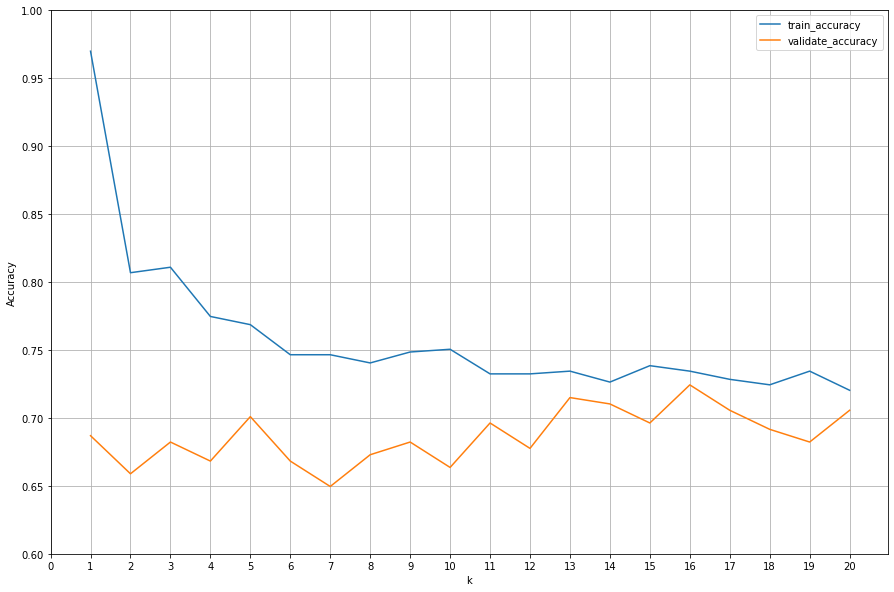

In [255]:
metrics = []

# loop through different values of k
for k in range(1, 21):
            
    # define the thing
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # fit the thing (remmeber only fit on training data)
    knn.fit(X_train, y_train)
    
    # use the thing (calculate accuracy)
    train_accuracy = knn.score(X_train, y_train)
    validate_accuracy = knn.score(X_validate, y_validate)
                
    
    output = {
        "k": k,
        "train_accuracy": train_accuracy,
        "validate_accuracy": validate_accuracy
    }
    
    metrics.append(output)

# make a dataframe
results = pd.DataFrame(metrics)

# plot the data
results.set_index('k').plot(figsize = (15,10))
plt.ylim(0.6, 1)
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,21,1))
plt.grid()

In [ ]:

# Logistic Regression Exercises


# 1. Create a model that includes age in addition to fare and pclass. Does this model perform better  
#    than your baseline?
# 2. Include sex in your model as well. Note that you'll need to encode or create a dummy variable of this feature 
#    before including it in a model.
# 3. Try out other combinations of features and models.
# 4. Use you best 3 models to predict and evaluate on your validate sample.
# 5. Choose you best model from the validation performation, and evaluate it on the test dataset. 
#    How do the performance metrics compare to validate? to train?


In [309]:
# acquire data

df = acquire.get_titanic_data()

In [310]:
avg_age = df.age.mean()
df.age= df.age.fillna(avg_age)

#encode gender column
df['is_female'] = (df.sex == 'female')

In [311]:
df = df.drop(columns=['passenger_id', 'deck', 'class', 'embarked', 'sex', 'embark_town'])

In [312]:
train, validate, test = prepare.prep_titanic(acquire.get_titanic_data())
train.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone,Q,S
583,583,0,1,male,36.000000,0,0,40.1250,C,First,Cherbourg,1,0,0
337,337,1,1,female,41.000000,0,0,134.5000,C,First,Cherbourg,1,0,0
50,50,0,3,male,7.000000,4,1,39.6875,S,Third,Southampton,0,0,1
218,218,1,1,female,32.000000,0,0,76.2917,C,First,Cherbourg,1,0,0
31,31,1,1,female,29.916875,1,0,146.5208,C,First,Cherbourg,0,0,0


In [313]:
# split into X and y

# train set
X_train = train.drop(columns=['survived'])
y_train = train.survived

# validate set
X_validate = validate.drop(columns=['survived'])
y_validate = validate.survived  

# test set
y_test = test.drop(columns=['survived'])
y_test = test.survived

In [314]:
# 1. Create a model that includes age in addition to fare and pclass. 

# Does this model perform better than your baseline? --- Yes,this model performs better than the baseline


In [326]:
# baseline - survived = 0

train['baseline'] = 0

In [328]:
print(f'The baseline accuracy is {(train.baseline == train.survived).mean():.2%}')

The baseline accuracy is 61.77%


In [315]:
# create the thing

logit = LogisticRegression(random_state = 123)
features= ['age', 'pclass', 'fare']

In [320]:
#fit the thing

logit.fit(X_train[features], y_train)

LogisticRegression(random_state=123)

In [321]:
y_pred =logit.predict(X_train[features])

In [325]:
print('Logistic Regression using age, pclass, and fare features')
print(f'training score: {logit.score(X_train[features], y_train):.2%}')

Logistic Regression using age, pclass, and fare features
training score: 71.63%


In [ ]:
# 2. Include sex in your model as well. Note that you'll need to encode or create a dummy variable of this feature 
#    before including it in a model.


In [329]:
# create dummys for sex column

train = pd.get_dummies(data = train, columns=['sex'], drop_first=[True,True])
validate = pd.get_dummies(data=validate, columns=['sex'], drop_first=[True,True])
test = pd.get_dummies(data=test, columns = ['sex'], drop_first=[True,True])

In [330]:
train.head()

,passenger_id,survived,pclass,age,sibsp,parch,fare,embarked,class,embark_town,alone,Q,S,baseline,sex_male
583,583,0,1,36.000000,0,0,40.1250,C,First,Cherbourg,1,0,0,0,1
337,337,1,1,41.000000,0,0,134.5000,C,First,Cherbourg,1,0,0,0,0
50,50,0,3,7.000000,4,1,39.6875,S,Third,Southampton,0,0,1,0,1
218,218,1,1,32.000000,0,0,76.2917,C,First,Cherbourg,1,0,0,0,0
31,31,1,1,29.916875,1,0,146.5208,C,First,Cherbourg,0,0,0,0,0


In [333]:
# recreate the X_col and y_col

X_cols = [ 'age','pclass', 'fare', 'sex_male']
y_col = 'survived'

X_train, y_train = train[X_cols], train[y_col]
X_validate, y_validate = validate[X_cols], validate[y_col]
X_test, y_test = test[X_cols], test[y_col]

In [334]:
# create the thing

logit2 = LogisticRegression(C=1.0 , random_state=123)

# fit the thing

logit2.fit(X_train, y_train)

LogisticRegression(random_state=123)

In [335]:
# now use the model to make predictions

y_pred = logit2.predict(X_train)

In [336]:
# model 2 score

print(f'training score: {logit2.score(X_train, y_train):.2%}')
print(f'validate score: {logit2.score(X_validate, y_validate):.2%}')

training score: 79.88%
validate score: 78.50%


In [337]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       307
           1       0.75      0.71      0.73       190

    accuracy                           0.80       497
   macro avg       0.79      0.78      0.78       497
weighted avg       0.80      0.80      0.80       497



In [338]:
# 3. Try out other combinations of features and models.


In [339]:
# create the thing

logit3 = LogisticRegression(C=1 ,class_weight='balanced', random_state=123)

# fit the thing

logit3.fit(X_train, y_train)

LogisticRegression(C=1, class_weight='balanced', random_state=123)

In [340]:
# now use the model to make predictions

y_pred = logit3.predict(X_train)

In [341]:
# model 3 score

print(f'training score: {logit3.score(X_train, y_train):.2%}')
print(f'validate score: {logit3.score(X_validate, y_validate):.2%}')

training score: 78.47%
validate score: 78.04%


In [342]:
# create the thing

logit4 = LogisticRegression(penalty='l2',C=0.5, random_state=123, class_weight={0:61, 1:39})

# fit the thing

logit4.fit(X_train, y_train)

LogisticRegression(C=0.5, class_weight={0: 61, 1: 39}, random_state=123)

In [343]:
# model 4 score

print(f'training score: {logit4.score(X_train, y_train):.2%}')
print(f'validate score: {logit4.score(X_validate, y_validate):.2%}')

training score: 80.28%
validate score: 76.64%


In [344]:
# 4. Use you best 3 models to predict and evaluate on your validate sample.


In [345]:
# create the thing

logit2 =LogisticRegression(C=1.0 , random_state=123)

# fit the thing

logit2.fit(X_train, y_train)

LogisticRegression(random_state=123)

In [351]:
# model 2 score

print(f'training score: {logit2.score(X_train, y_train):.2%}')
print(f'validate score: {logit2.score(X_validate, y_validate):.2%}')

training score: 79.88%
validate score: 78.50%


In [346]:
# create the thing

logit4 =LogisticRegression(penalty='l2',C=0.5, random_state=123, class_weight={0:61, 1:39})

# fit the thing

logit4.fit(X_train, y_train)

LogisticRegression(C=0.5, class_weight={0: 61, 1: 39}, random_state=123)

In [352]:
# model 4 score

print(f'training score: {logit4.score(X_train, y_train):.2%}')
print(f'validate score: {logit4.score(X_validate, y_validate):.2%}')

training score: 80.28%
validate score: 76.64%


In [362]:
# create the thing

logit5 = LogisticRegression(C=1, class_weight={0:50, 1:50}, random_state=123, intercept_scaling=1, solver='sag')

# fit the thing

logit5.fit(X_train, y_train)

LogisticRegression(C=1, class_weight={0: 50, 1: 50}, random_state=123,
                   solver='sag')

In [ ]:
# model 5 score

print(f'training score: {logit5.score(X_train, y_train):.2%}')
print(f'validate score: {logit5.score(X_validate, y_validate):.2%}')

In [361]:
# create the thing

logit6 = LogisticRegression(C=1, class_weight={0:61, 1:39}, random_state=123, intercept_scaling=1, solver='sag')

# fit the thing

logit6.fit(X_train, y_train)

LogisticRegression(C=1, class_weight={0: 61, 1: 39}, random_state=123,
                   solver='sag')

In [ ]:
# model 6 score

print(f'training score: {logit6.score(X_train, y_train):.2%}')
print(f'validate score: {logit6.score(X_validate, y_validate):.2%}')

In [ ]:
# 5. Choose you best model from the validation performation, and evaluate it on the test dataset. 
#    How do the performance metrics compare to validate? to train?


In [360]:
# create the thing

logit4 = LogisticRegression(C=1, class_weight={0:50, 1:50}, random_state=123, intercept_scaling=1, solver='lbfgs')

# fit the thing

logit4.fit(X_train, y_train)

LogisticRegression(C=1, class_weight={0: 50, 1: 50}, random_state=123)

In [355]:
# model 4 score

print(f'training score: {logit4.score(X_train, y_train):.2%}')
print(f'validate score: {logit4.score(X_validate, y_validate):.2%}')

training score: 79.68%
validate score: 78.50%


In [359]:
# create the thing

logit7 = LogisticRegression(C=1, class_weight={0:50, 1:50}, random_state=123, intercept_scaling=1, solver='lbfgs')

# fit the thing

logit7.fit(X_test, y_test)

LogisticRegression(C=1, class_weight={0: 50, 1: 50}, random_state=123)

In [358]:
# model 7 score

print(f'test score: {logit7.score(X_test, y_test):.2%}')

test score: 82.02%


Bonus1: How do different strategies for handling the missing values in the age column affect model performance?


Bonus2: How do different strategies for encoding sex affect model performance?


Bonus3: scikit-learn's LogisticRegression classifier is actually applying a regularization penalty to the coefficients by default. This penalty causes the magnitude of the coefficients in the resulting model to be smaller than they otherwise would be. This value can be modified with the C hyper parameter. Small values of C correspond to a larger penalty, and large values of C correspond to a smaller penalty.
Try out the following values for C and note how the coefficients and the model's performance on both the dataset it was trained on and on the validate split are affected.
C
=
.01
,
.1
,
1
,
10
,
100
,
1000


Bonus Bonus: how does scaling the data interact with your choice of C?